In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from src.zss.zss_model1 import ItemItemRecommender

plt.style.use("ggplot")
plt.rc("xtick", labelsize=22)
plt.rc("ytick", labelsize=22)

In [2]:
def get_ratings_data():
    """
    Returns:
        ratings_contents (dataframe): has columns "user", "movie", "rating"
        ratings_as_mat (sparse matrix): rows correspond to users and columns correspond
        to movies. Each element is the user's rating for that movie.
    """
    ratings_contents = pd.read_csv("../data/training.csv", low_memory=False).drop(columns=["timestamp"])
    ratings_as_mat = csr_matrix((ratings_contents.rating, (ratings_contents.user, ratings_contents.movie)))
    return ratings_contents, ratings_as_mat

# userRatings = pd.read_csv("../data/training.csv", low_memory=False).drop(columns=["timestamp"])
userRatings, userRatingsAsMatrix = get_ratings_data()

In [3]:
userRatings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    800000 non-null  int64
 1   movie   800000 non-null  int64
 2   rating  800000 non-null  int64
dtypes: int64(3)
memory usage: 18.3 MB


In [4]:
userRatings.head()

,user,movie,rating
0,6040,858,4
1,6040,593,5
2,6040,2384,4
3,6040,1961,4
4,6040,2019,5


In [5]:
ratings = userRatings.pivot_table(values="rating", index="user", columns="movie")

Mean number of reviews: 148.17558807186515


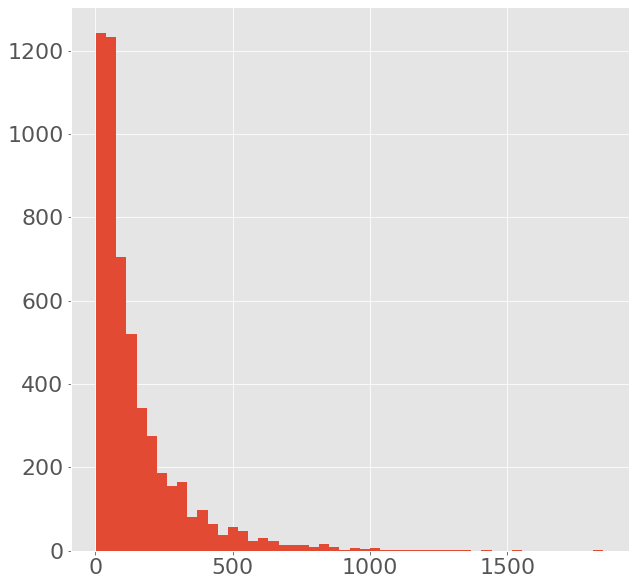

In [6]:
test = (ratings > 0).sum(axis=1)

fig, ax = plt.subplots(figsize=(10,10))

print(f"Mean number of reviews: {test.values.mean()}")
ax.hist(test.values, bins=50);

In [7]:
train, test = train_test_split(userRatings, train_size=0.8)

train.reset_index()
test.reset_index()

rec = ItemItemRecommender(neighborhood_size=75)

In [8]:
rec.fit(ratings_mat=userRatingsAsMatrix)

In [ ]:
for user in range(rec.n_users):
    rec.top_n_recs(user_id=user, n=rec.n_items, report_run_time=True)

E:\Galvanize\Repos\movie-recommender\src\zss\zss_model1.py:41: RuntimeWarning: invalid value encountered in true_divide
  out[item_to_rate] = self.ratings_mat[user_id, relevant_items] * \


Execution time: 0.595497 seconds
Execution time: 0.594498 seconds
Execution time: 0.515501 seconds
Execution time: 0.545002 seconds
Execution time: 0.577502 seconds
Execution time: 0.548999 seconds
Execution time: 0.505501 seconds
Execution time: 0.494501 seconds
Execution time: 0.523501 seconds
Execution time: 0.504002 seconds
Execution time: 0.521001 seconds
Execution time: 0.475501 seconds
Execution time: 0.514001 seconds
Execution time: 0.484502 seconds
Execution time: 0.557999 seconds
Execution time: 0.560001 seconds
Execution time: 0.502501 seconds
Execution time: 0.533998 seconds
Execution time: 0.508501 seconds
Execution time: 0.502000 seconds
Execution time: 0.521500 seconds
Execution time: 0.562500 seconds
Execution time: 0.591001 seconds
Execution time: 0.542001 seconds
Execution time: 0.511499 seconds
Execution time: 0.518500 seconds
Execution time: 0.543501 seconds
Execution time: 0.588500 seconds
Execution time: 0.556501 seconds
Execution time: 0.532000 seconds
Execution 

In [10]:
rec.n_users
rec.n_items

# rec.pred_all_users()

3953